In [2]:
#importing necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
print(tf.__version__)

2.11.0


In [3]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
#reading/importing sv file 
df=pd.read_csv(r'Churn_Modelling.csv')

In [5]:
#checking overview of the data 
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df['Surname'].value_counts()

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64

In [7]:
df['Surname'].nunique()

2932

In [8]:
#dropping some unnecessary data
df.drop(columns=['RowNumber', 'CustomerId','Surname'],inplace=True)

In [9]:
df.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1


Here is two categorical columns those we need to encode

In [10]:
#checking value counts of two categorical variables
print (df['Geography'].value_counts())
print (df['Gender'].value_counts())


France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
Male      5457
Female    4543
Name: Gender, dtype: int64


In [11]:
#encoding two categorical variables 
df= pd.get_dummies(df, columns=['Geography','Gender'], drop_first= True)

In [12]:
#check the overview of data after encodeing two categorical variables
df.sample(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
551,674,47,6,106901.94,1,1,1,2079.20,1,1,0,1
6050,703,44,6,98862.54,1,1,0,151516.70,0,0,0,1
3759,721,40,9,118129.87,1,1,1,160277.65,0,0,0,1


In [13]:
#checking info (data tyes, null values)of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


In [14]:
#checking null values
df.isnull().sum()

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64

In [15]:
#checking duplicacy of data 
df.duplicated().sum()

0

In [16]:
#checking columns name
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [17]:
#for doing train_test_split, separating dataframe 
X=df.drop(columns=['Exited'])
y=df['Exited']

In [18]:
# performing train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=101)

In [19]:
#checking shape of the data after spliting
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(7500, 11) (2500, 11)
(7500,) (2500,)


In [20]:
#scaling
scaler=StandardScaler()
X_train_trans=scaler.fit_transform(X_train)
X_test_trans=scaler.fit_transform(X_test)

In [21]:
#building model
model=Sequential()
model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
          

In [22]:
#summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [23]:
#compile the model
model.compile(loss='binary_crossentropy',optimizer='Adam', metrics=['accuracy'])

In [24]:
#fit the model to train neural network
history=model.fit(X_train_trans,y_train, epochs=100, validation_split=0.2)

Epoch 1/100
188/188 [==============================] - 4s 7ms/step - loss: 0.6711 - accuracy: 0.6165 - val_loss: 0.5079 - val_accuracy: 0.8087
Epoch 2/100
188/188 [==============================] - 1s 4ms/step - loss: 0.4853 - accuracy: 0.8027 - val_loss: 0.4490 - val_accuracy: 0.8153
Epoch 3/100
188/188 [==============================] - 1s 4ms/step - loss: 0.4522 - accuracy: 0.8100 - val_loss: 0.4236 - val_accuracy: 0.8233
Epoch 4/100
188/188 [==============================] - 1s 4ms/step - loss: 0.4386 - accuracy: 0.8140 - val_loss: 0.4104 - val_accuracy: 0.8307
Epoch 5/100
188/188 [==============================] - 1s 4ms/step - loss: 0.4303 - accuracy: 0.8180 - val_loss: 0.4022 - val_accuracy: 0.8333
Epoch 6/100
188/188 [==============================] - 1s 4ms/step - loss: 0.4241 - accuracy: 0.8195 - val_loss: 0.3955 - val_accuracy: 0.8360
Epoch 7/100
188/188 [==============================] - 1s 4ms/step - loss: 0.4184 - accuracy: 0.8205 - val_loss: 0.3894 - val_accuracy: 0.8360

In [25]:
model.layers[0].get_weights()

[array([[-2.8178981e-01,  3.3928239e-01, -3.5228831e-01,  1.1420647e-01,
          7.7238746e-02,  2.5668964e-01,  3.1167442e-02,  4.0935463e-01,
         -2.2013578e-01,  3.3580044e-01,  4.0797763e-02],
        [ 3.5679337e-02,  4.9850736e-02,  1.3650634e+00, -1.4236498e-01,
          1.9038744e-01, -4.0935302e-01, -2.5547770e-01,  7.7277339e-01,
          1.4742105e-01, -1.0005217e+00,  2.3107344e-01],
        [ 4.5633832e-01, -1.7718455e-01, -1.7699629e-01, -2.7797091e-01,
          8.7411135e-02, -2.5055838e-01, -5.0399158e-02,  3.4979212e-01,
         -1.0231585e-01,  3.7210473e-01, -7.3545478e-02],
        [-3.7125033e-01, -2.6445168e-01, -7.6148413e-02,  5.9504825e-01,
         -2.7592921e-01, -9.5154673e-01,  5.9553123e-01,  8.8403939e-04,
          5.2670825e-02,  3.1123894e-01,  6.0421479e-01],
        [ 4.1482919e-01, -3.9448735e-01, -4.2625326e-01, -2.9467204e-01,
         -1.1885082e+00,  5.3980734e-02,  8.9869857e-02, -1.7896414e-01,
          1.2992465e+00, -7.1759278e-0

In [26]:
model.layers[1].get_weights()

[array([[ 0.36010486,  0.2560354 ,  0.08378747, -0.8458074 ,  0.1564205 ,
          0.07291158,  0.18118484, -0.07049038,  0.20741403, -1.0928417 ,
         -0.42033666],
        [ 0.19136329, -1.0908158 , -0.4695024 , -0.6213484 ,  0.4237977 ,
          0.07277191,  0.38131043, -0.51867265, -0.04644449, -2.265335  ,
          0.08725455],
        [-0.84485227, -0.1449988 ,  0.6483597 ,  0.26301426,  0.50683564,
         -0.01211048, -0.2458251 ,  0.03355318,  0.36720216, -0.1083908 ,
          0.48690796],
        [ 0.44033098, -0.27247494, -0.21123327,  0.30177823,  0.5565852 ,
          0.08315432,  0.0346894 ,  0.49114776,  0.46827534, -0.10880046,
          0.00925927],
        [ 0.4518456 ,  0.16274323, -0.8512337 , -0.6697774 ,  0.00267927,
         -0.46062794,  0.7102316 ,  0.2665229 ,  0.5451896 , -1.102841  ,
          0.6808535 ],
        [ 0.09468653, -0.21351539, -0.04964408, -0.93216425,  0.31443995,
         -0.11938596, -0.4402386 , -0.36517808,  0.40391013,  0.1314881

In [27]:
model.layers[2].get_weights()

[array([[-1.3543788 ],
        [ 1.4138768 ],
        [-1.4346504 ],
        [ 1.1100157 ],
        [-0.45905766],
        [-0.42406896],
        [ 0.92768276],
        [ 0.38852844],
        [ 0.7042331 ],
        [ 1.22007   ],
        [ 0.61703557]], dtype=float32),
 array([-0.17475848], dtype=float32)]

In [28]:
model.predict(X_test_trans)

79/79 [==============================] - 0s 2ms/step


array([[0.00739636],
       [0.03254944],
       [0.41173854],
       ...,
       [0.03069986],
       [0.07750131],
       [0.20939316]], dtype=float32)

In [29]:
y_log=model.predict(X_test_trans)

79/79 [==============================] - 0s 3ms/step


In [30]:
y_pred=np.where(y_log>0.5,1,0)

In [31]:
from sklearn.metrics import accuracy_score

In [42]:
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

Accuracy Score:  0.8628


In [33]:
history

In [34]:
history.history

{'loss': [0.6711137294769287,
  0.48531222343444824,
  0.4521811008453369,
  0.43858885765075684,
  0.43026331067085266,
  0.4241494834423065,
  0.4183919131755829,
  0.4116345942020416,
  0.4051639437675476,
  0.3968387544155121,
  0.3872142732143402,
  0.37885716557502747,
  0.371461421251297,
  0.365447074174881,
  0.36101388931274414,
  0.3576940894126892,
  0.3550049364566803,
  0.3527141511440277,
  0.3511163294315338,
  0.3497391641139984,
  0.34970882534980774,
  0.34700867533683777,
  0.3465419411659241,
  0.3454190790653229,
  0.3442738354206085,
  0.3438023328781128,
  0.3435538709163666,
  0.3427395522594452,
  0.3414953947067261,
  0.3414823114871979,
  0.3411506712436676,
  0.34114259481430054,
  0.34093472361564636,
  0.3400943875312805,
  0.33925217390060425,
  0.3386649787425995,
  0.33845967054367065,
  0.33812379837036133,
  0.33787161111831665,
  0.33713939785957336,
  0.3365721106529236,
  0.3366661071777344,
  0.33599260449409485,
  0.33484530448913574,
  0.335625

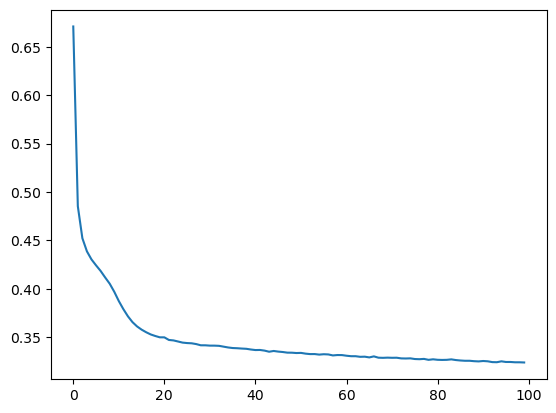

In [35]:
plt.plot(history.history['loss'])

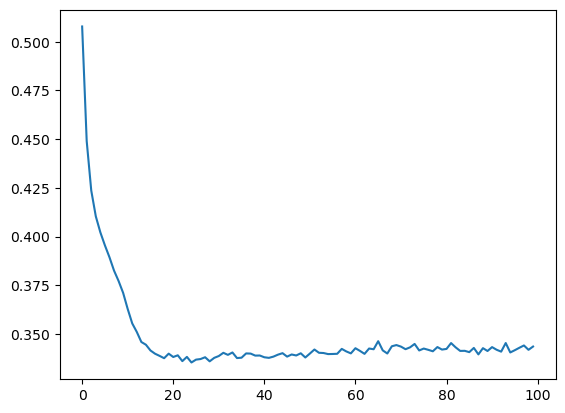

In [36]:
plt.plot(history.history['val_loss'])

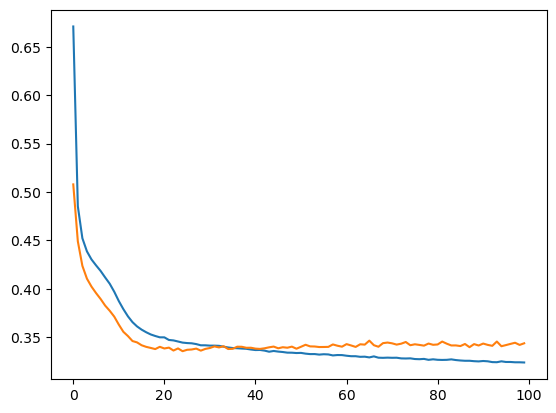

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

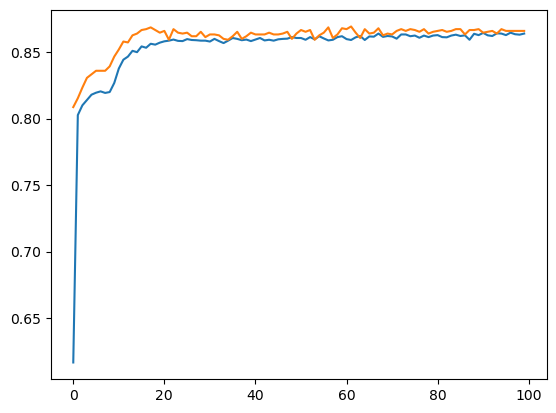

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])